In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [3]:
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


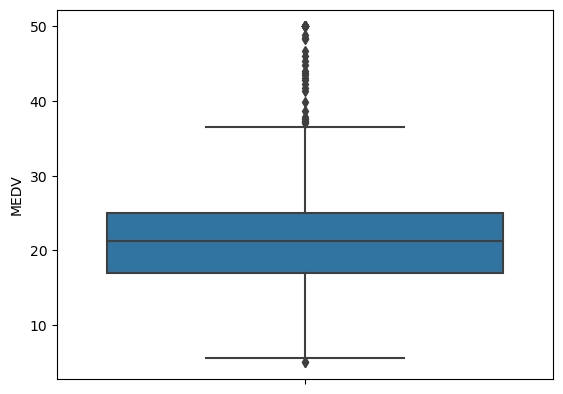

In [5]:
### For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(y='MEDV', data=boston_df)
plt.show()

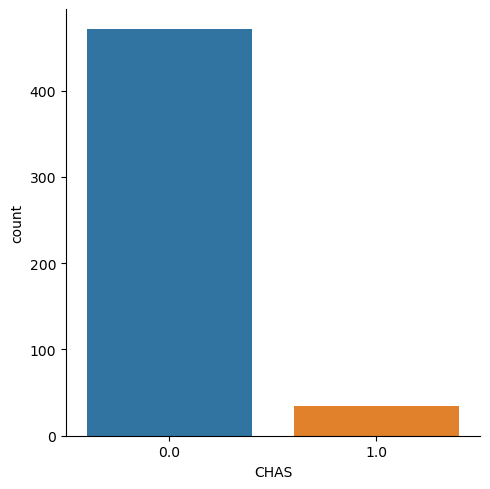

In [6]:
### Provide a  bar plot for the Charles river variable

sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.show()

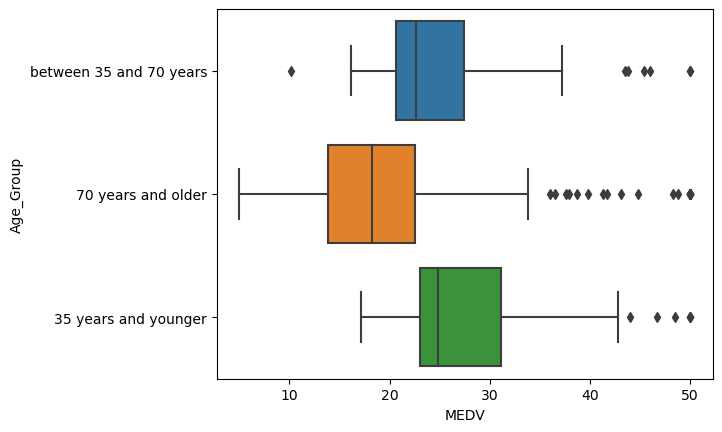

In [7]:
### Provide a boxplot for the MEDV variable vs the AGE variable. 
### Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

ax3 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
plt.show()

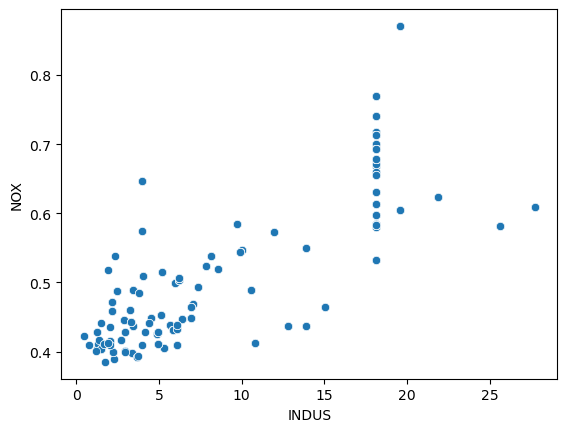

In [8]:
### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
### What can you say about the relationship?

ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
plt.show()

In [9]:
### Values in the bottom-left section of the scatter plot indicates a strong positive relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.
### In general, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

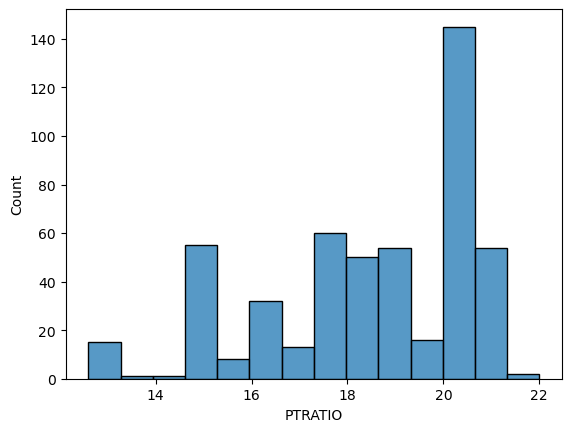

In [10]:
### Create a histogram for the pupil to teacher ratio variable

ax = sns.histplot(boston_df['PTRATIO'], kde = False)
plt.show()

In [12]:
### Task 5

### Is there a significant difference in median value of houses bounded by the Charles river or not?
### H0: There is no significant difference in median value of houses bounded by the Charles river.

import scipy.stats

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0 ]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [13]:
### The p-value is less than 0.05, we reject the Null Hypothesis, meaning there is not a statistical difference in median value between houses near the Charles River and houses far away

In [14]:
### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
### H0: There is no statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [15]:
### The p-value is less than 0.05, we fail to accept the Null Hypothesis, meaning that there is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [16]:
### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
### H0: There is no statistical relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

### The correlation coefficienct is 0.7635, The p value is less than 0.05, so we reject the null hypothesis, meaning that there is a postive relationship between NOX and INDUS.  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           7.91e-98
Time:                        04:56:58   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?


X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


### The correlation coefficient is 0.2490, the p value is less than 0.05, meaning there is a postive realtionship between DIS and MEDV.
### The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 of MEDV.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        04:57:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""